In [74]:
import matplotlib.pyplot as plt
import requests
from datetime import datetime
%matplotlib inline
plt.style.use('seaborn')

## Helper Functions

In [75]:
# convert the datetime string provided by the api to a python datetime object
def convert_date(s: str):
    date_format = '%a, %d %b %Y %X GMT'
    return datetime.strptime(s, date_format)
    
# test_date = 'Wed, 26 Aug 2020 13:04:40 GMT'
# convert_date(test_date)

# Call the API
the end point that provides all recorded temperature data was accessed.
It is provided as a list of lists containing a date object and floating point number representing temperature in Celsius.

In [76]:
url = 'http://192.168.1.102:5000/'

temp_api = f'{url}all_temperatures'
temp_data = requests.get(temp_api).json()

humidity_api = f'{url}all_humidities'
humidity_data = requests.get(humidity_api).json()

pressure_api = f'{url}all_pressures'
pressure_data = requests.get(pressure_api).json()

pm10_api = f'{url}all_pm10'
pm10_data = requests.get(pm10_api).json()

pm25_api = f'{url}all_pm25'
pm25_data = requests.get(pm25_api).json()

pm100_api = f'{url}all_pm100'
pm100_data = requests.get(pm100_api).json()

# Prepare and Plot the Data

## Temperature

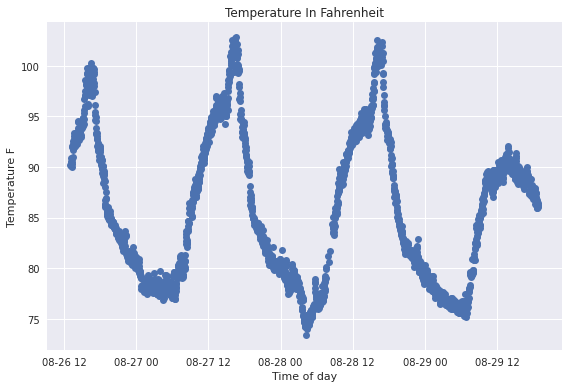

In [86]:
# trim and split the data
temp_slc = slice(None, None, None)
dates = [x[0] for x in temp_data[temp_slc]]
temps = [x[1] for x in temp_data[temp_slc]]

# transform C -> F
temps = [(1.8 * x) + 32 for x in temps]

# turn date string into datetime object
dates = [convert_date(x) for x in dates]

# plot the data
plt.plot_date(dates, temps)
plt.title('Temperature In Fahrenheit')
plt.xlabel('Time of day')
plt.ylabel('Temperature F')
plt.tight_layout()
# plt.show()

## Humidity

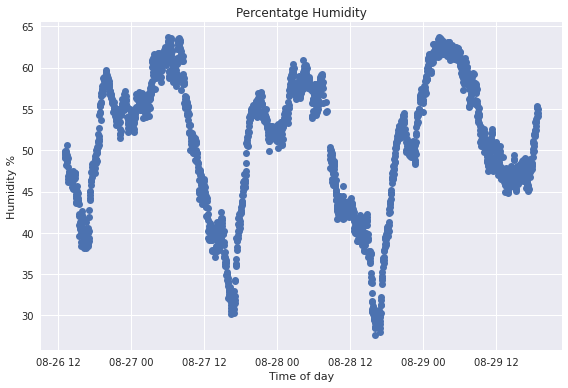

In [78]:
# trim and split the data
humidity_slc = slice(None, None, None)
dates = [x[0] for x in humidity_data[humidity_slc]]
humidities = [x[1] for x in humidity_data[humidity_slc]]

# turn date string into datetime object
dates = [convert_date(x) for x in dates]

# plot the data
plt.plot_date(dates, humidities)
plt.title('Percentatge Humidity')
plt.xlabel('Time of day')
plt.ylabel('Humidity %')
plt.tight_layout()
# plt.show()

## Pressure

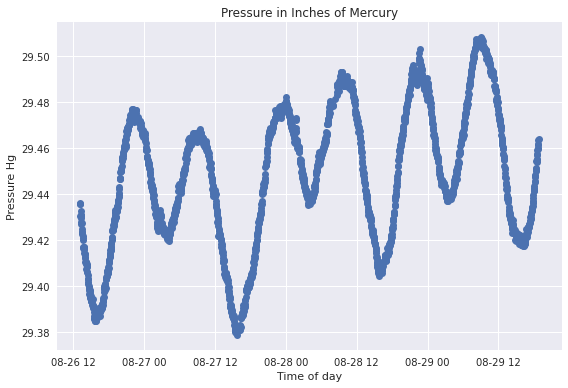

In [79]:
# trim and split the data
pressure_slc = slice(None, None, None)
dates = [x[0] for x in pressure_data[pressure_slc]]
pressures = [x[1] for x in pressure_data[pressure_slc]]

# convert millibar to inches of mrecury
pressures = [x * 0.029530 for x in pressures]

# turn date string into datetime object
dates = [convert_date(x) for x in dates]

# plot the data
plt.plot_date(dates, pressures)
plt.title('Pressure in Inches of Mercury')
plt.xlabel('Time of day')
plt.ylabel('Pressure Hg')
plt.tight_layout()
# plt.show()

## PM10

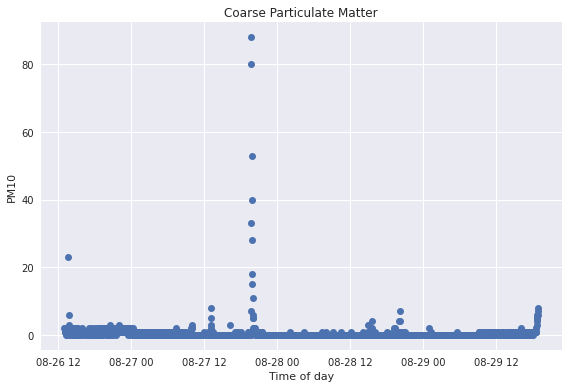

In [80]:
# trim and split the data
pm10_slc = slice(None, None, None)
dates = [x[0] for x in pm10_data[pm10_slc]]
pm10 = [x[1] for x in pm10_data[pm10_slc]]

# turn date string into datetime object
dates = [convert_date(x) for x in dates]

# plot the data
plt.plot_date(dates, pm10)
plt.title('Coarse Particulate Matter')
plt.xlabel('Time of day')
plt.ylabel('PM10')
plt.tight_layout()
# plt.show()

## PM25

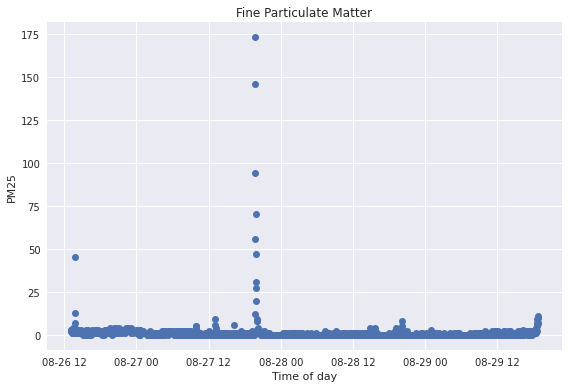

In [81]:
# trim and split the data
pm25_slc = slice(None, None, None)
dates = [x[0] for x in pm25_data[pm25_slc]]
pm25 = [x[1] for x in pm25_data[pm25_slc]]

# turn date string into datetime object
dates = [convert_date(x) for x in dates]

# plot the data
plt.plot_date(dates, pm25)
plt.title('Fine Particulate Matter')
plt.xlabel('Time of day')
plt.ylabel('PM25')
plt.tight_layout()
# plt.show()

# PM100

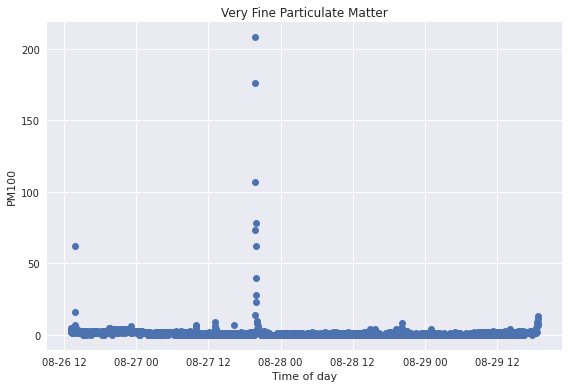

In [82]:
# trim and split the data
pm100_slc = slice(None, None, None)
dates = [x[0] for x in pm100_data[pm100_slc]]
pm100 = [x[1] for x in pm100_data[pm100_slc]]

# turn date string into datetime object
dates = [convert_date(x) for x in dates]

# plot the data
plt.plot_date(dates, pm100)
plt.title('Very Fine Particulate Matter')
plt.xlabel('Time of day')
plt.ylabel('PM100')
plt.tight_layout()
# plt.show()